# What Makes Songs Popular?
I have always been super interested in music and keeping up with popular music trends. In this project, I will use Spotify data to compare songs length, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, and tempo to see what the popular songs have in common. These descriptors are all provided by Spotify, and I do not fully know how they score all of them but there are a few in particular that I found interesting such as song length, danceability, energy, and valence.

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

The three main datasets I chose to work with were as follows: "Tracks Old", which contains song data from Decemeber 2020;
"Tracks", which contains song data from April 2021; and "Artists" which contains artist data from April 2021. I found these datasets on Kaggle: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [246]:
artists = pd.read_csv("artists.csv")
tracks = pd.read_csv("tracks.csv")
tracksold = pd.read_csv("data_o.csv")

First, I cleaned the data and created two more Pandas dataframes of song data from only the songs that have a popularity score of 90 or above. I will be referring to these as the "popular songs" for the rest of the project.

In [247]:
artists = artists.dropna()
tracks = tracks.dropna()
artistsold = artistsold.dropna()
tracksold = tracksold.dropna()
moststreamed = moststreamed.drop(moststreamed.columns[[0]], axis = 1)
tracksoldpop = tracksold[tracksold['popularity'] > 89]
trackspop = tracks[tracks['popularity'] > 89]

In this table we can see the 10 most popular songs from when this data was collected in December 2020.

In [248]:
tracksoldpop.sort_values('popularity', ascending=False).head(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
19611,0.1450,2020,0.40100,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,Dakiti,100,2020-10-30,0.0544,109.928
19606,0.7560,2020,0.22100,"['24kGoldn', 'iann dior']",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),99,2020-07-24,0.0369,90.989
19618,0.7370,2020,0.01120,['BTS'],0.746,199054,0.765,0,0t1kP63rueHleOhQkYSXFY,0.000000,6,0.0936,-4.410,0,Dynamite,97,2020-08-28,0.0993,114.044
19608,0.3570,2020,0.01940,"['Cardi B', 'Megan Thee Stallion']",0.935,187541,0.454,1,4Oun2ylbjFKMPTiaSbbCih,0.000000,1,0.0824,-7.509,1,WAP (feat. Megan Thee Stallion),96,2020-08-07,0.3750,133.073
19610,0.6820,2020,0.46800,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015
19612,0.5430,2020,0.65000,['Pop Smoke'],0.709,160000,0.548,1,1tkg4EHVoqnhR6iFEXb60y,0.000002,10,0.1330,-8.493,1,What You Know Bout Love,96,2020-07-03,0.3530,83.995
19616,0.3340,2020,0.00146,['The Weeknd'],0.514,200040,0.730,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1,0.0897,-5.934,1,Blinding Lights,96,2020-03-20,0.0598,171.005
19615,0.3720,2020,0.19600,"['Justin Bieber', 'Chance the Rapper']",0.673,212093,0.704,0,5u1n1kITHCxxp8twBcZxWy,0.000000,6,0.0898,-8.056,1,Holy (feat. Chance The Rapper),95,2020-09-18,0.3600,86.919
19607,0.3470,2020,0.11400,"['Pop Smoke', 'Lil Baby', 'DaBaby']",0.823,190476,0.586,1,0PvFJmanyNQMseIFrU708S,0.000000,6,0.1930,-6.606,0,For The Night (feat. Lil Baby & DaBaby),95,2020-07-03,0.2000,125.971
19623,0.0799,2020,0.78600,['Tate McRae'],0.642,169266,0.374,0,45bE4HXI0AwGZXfZtMp8JR,0.000000,4,0.0906,-9.386,1,you broke me first,95,2020-04-17,0.0545,124.099


Here we have the 10 most popular songs from when this data was collected in April 2021.

In [249]:
trackspop.sort_values('popularity', ascending=False).head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4
93807,4cG7HUWYHBV6R6tHn1gxrl,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,94,169153,0,"['Riton', 'Nightcrawlers', 'Mufasa & Hypeman',...","['7i9j813KFoSBMldGqlh2Z1', '1gALaWbNDnwS2ECV09...",2021-01-15,0.824,0.862,2,-3.424,1,0.1260,0.00760,0.000132,0.3030,0.801,122.980,4


## Popularity Overview:
For the rest of this project, I chose to create histograms comparing the frequency of scores in each dataset. The black dotted line in the figures represents the mean value of that category. In the first graph, the black dotted line represents the average popularity score of all songs in the December 2020 dataset.

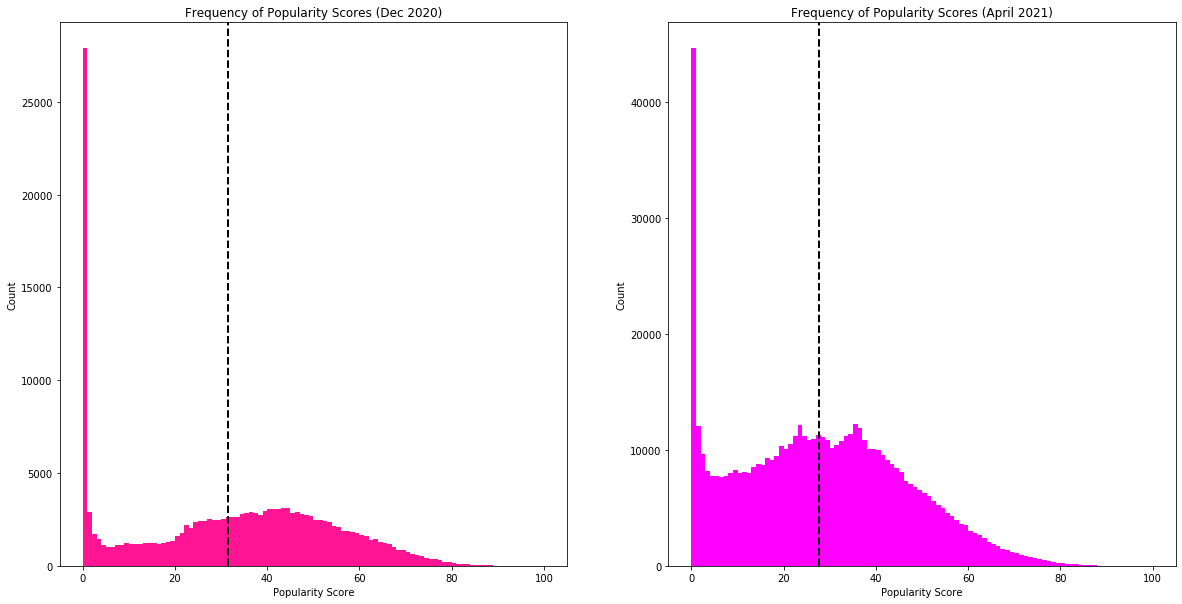

December Avg: 31.431794342906365    April Avg: 27.573212456166967


In [250]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.subplot(1,2,1)
plt.hist(tracksold['popularity'],100, color='deeppink')
plt.axvline(tracksold['popularity'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.title("Frequency of Popularity Scores (Dec 2020)")
plt.xlabel("Popularity Score")
plt.ylabel("Count")
plt.subplot(1,2,2)
plt.hist(tracks['popularity'],100, color='magenta')
plt.axvline(tracks['popularity'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.title("Frequency of Popularity Scores (April 2021)")
plt.xlabel("Popularity Score")
plt.ylabel("Count")
plt.show()
print("December Avg:", tracksold['popularity'].mean(), "   April Avg:", tracks['popularity'].mean())

## Song length:

For the following cells, the lime dotted line represents the average value of the popular songs from each respective dataset. So in the first graph, the dotted line is the average song length of the songs with a popularity score of 90 or above in the December 2020 song data.

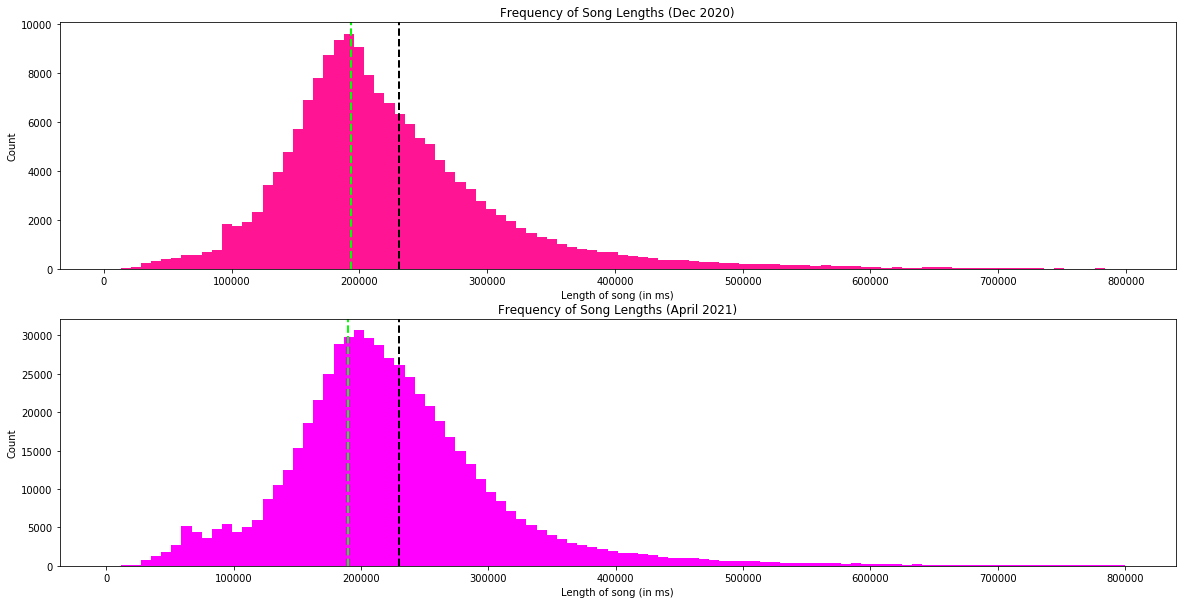

December Avg: 230948.3106655025    April Avg: 230054.85262554957
December Popular Avg:  193585.08    April Popular Avg: 189792.95918367346


In [251]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.subplot(2,1,1)
plt.hist(tracksold[tracksold['duration_ms'] < 800000]['duration_ms'],100, color='deeppink')
plt.axvline(tracksold['duration_ms'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(tracksoldpop['duration_ms'].mean(), color='lime', linestyle='dashed', linewidth=2)
plt.title("Frequency of Song Lengths (Dec 2020)")
plt.xlabel("Length of song (in ms)")
plt.ylabel("Count")
plt.subplot(2,1,2)
plt.hist(tracks[tracks['duration_ms'] < 800000]['duration_ms'],100,color='magenta')
plt.axvline(tracks['duration_ms'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(trackspop['duration_ms'].mean(), color='lime', linestyle='dashed', linewidth=2)
plt.title("Frequency of Song Lengths (April 2021)")
plt.xlabel("Length of song (in ms)")
plt.ylabel("Count")
plt.show()
print("December Avg:", tracksold['duration_ms'].mean(), "   April Avg:", tracks['duration_ms'].mean())
print("December Popular Avg: ", tracksoldpop['duration_ms'].mean(), "   April Popular Avg:", trackspop['duration_ms'].mean())

Popular songs are shorter on average, by around 40 seconds! Shorter songs may get more streams than longer songs, or songs may gain popularity because people prefer shorter songs.

## Danceability:

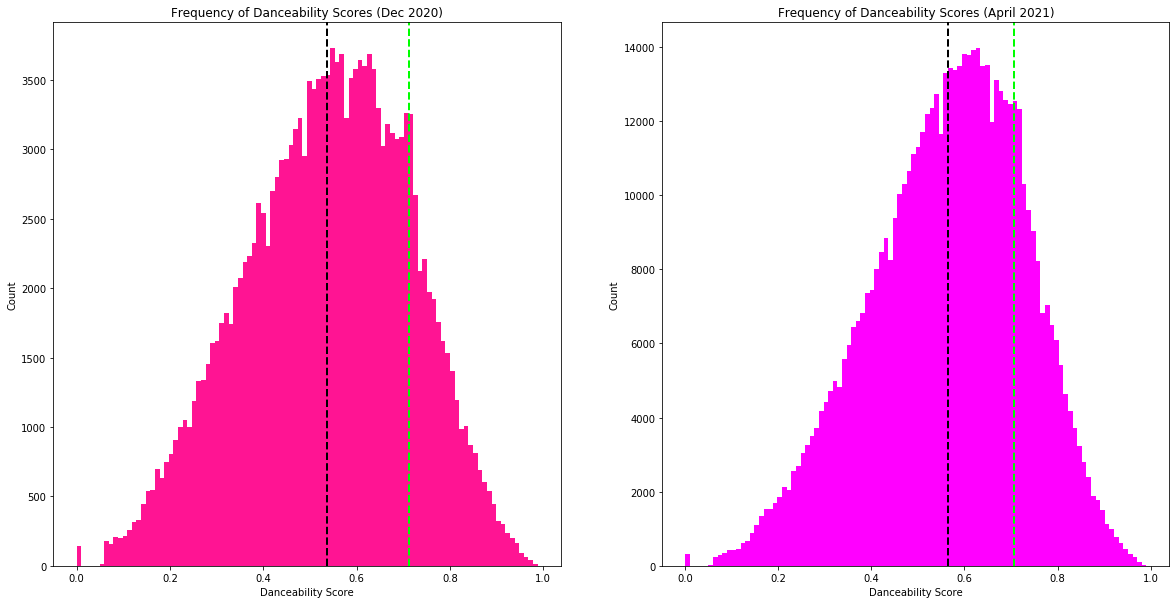

December Avg: 0.5373955347986906    April Avg: 0.5636118663282339
December Popular Avg:  0.71234    April Popular Avg: 0.7061836734693879


In [252]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.subplot(1,2,1)
plt.hist(tracksold['danceability'],100, color='deeppink')
plt.axvline(tracksold['danceability'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(tracksoldpop['danceability'].mean(), color='lime', linestyle='dashed', linewidth=2)
plt.title("Frequency of Danceability Scores (Dec 2020)")
plt.xlabel("Danceability Score")
plt.ylabel("Count")
plt.subplot(1,2,2)
plt.hist(tracks['danceability'],100, color='magenta')
plt.axvline(tracks['danceability'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(trackspop['danceability'].mean(), color='lime', linestyle='dashed', linewidth=2)
plt.title("Frequency of Danceability Scores (April 2021)")
plt.xlabel("Danceability Score")
plt.ylabel("Count")
plt.show()
print("December Avg:", tracksold['danceability'].mean(), "   April Avg:", tracks['danceability'].mean())
print("December Popular Avg: ", tracksoldpop['danceability'].mean(), "   April Popular Avg:", trackspop['danceability'].mean())

## Energy:

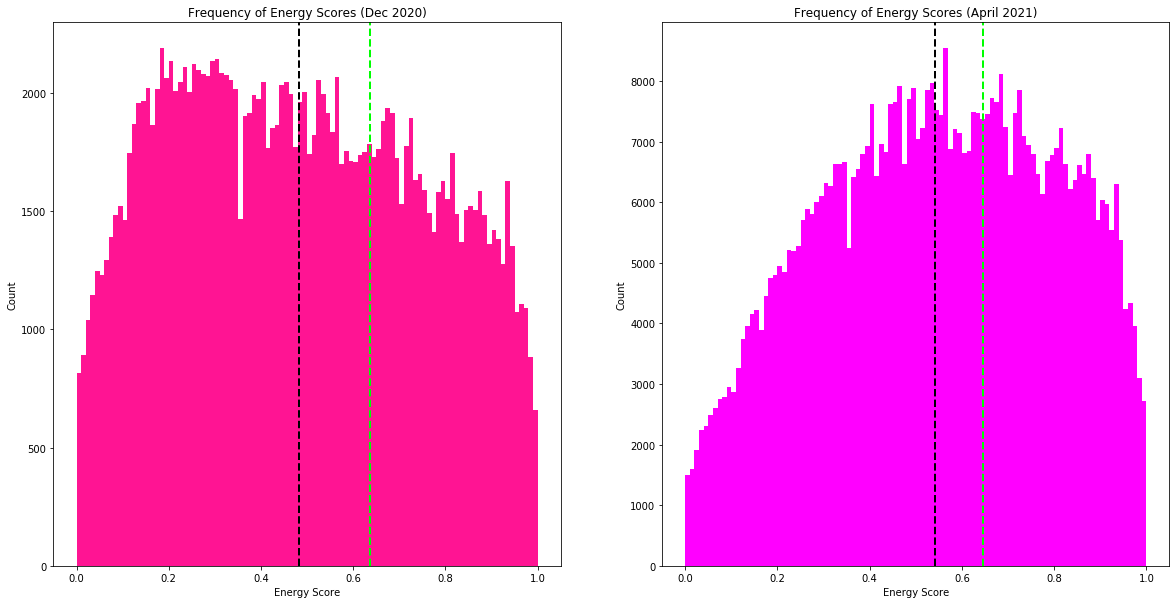

December Avg: 0.48238883511277697    April Avg: 0.5420710857069857
December Popular Avg:  0.6355000000000003    April Popular Avg: 0.6448775510204083


In [253]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.subplot(1,2,1)
plt.hist(tracksold['energy'],100, color='deeppink')
plt.axvline(tracksold['energy'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(tracksoldpop['energy'].mean(), color='lime', linestyle='dashed', linewidth=2)
plt.title("Frequency of Energy Scores (Dec 2020)")
plt.xlabel("Energy Score")
plt.ylabel("Count")
plt.subplot(1,2,2)
plt.hist(tracks['energy'],100, color='magenta')
plt.axvline(tracks['energy'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(trackspop['energy'].mean(), color='lime', linestyle='dashed', linewidth=2)
plt.title("Frequency of Energy Scores (April 2021)")
plt.xlabel("Energy Score")
plt.ylabel("Count")
plt.show()
print("December Avg:", tracksold['energy'].mean(), "   April Avg:", tracks['energy'].mean())
print("December Popular Avg: ", tracksoldpop['energy'].mean(), "   April Popular Avg:", trackspop['energy'].mean())

It looks like the average energy score for songs increased from December 2020 to April 2021, while the popular average stayed around the same.

## Loudness

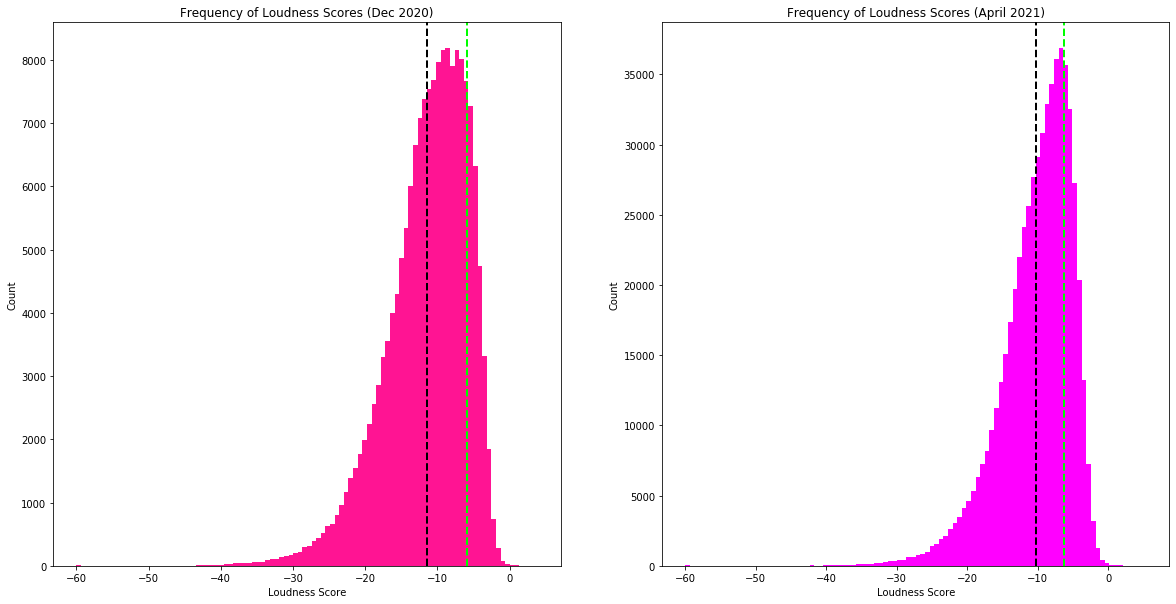

December Avg: -11.467990038264722    April Avg: -10.205788933193233
December Popular Avg:  -5.877800000000001    April Popular Avg: -6.249244897959185


In [254]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.subplot(1,2,1)
plt.hist(tracksold['loudness'],100, color='deeppink')
plt.axvline(tracksold['loudness'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(tracksoldpop['loudness'].mean(), color='lime', linestyle='dashed', linewidth=2)
plt.title("Frequency of Loudness Scores (Dec 2020)")
plt.xlabel("Loudness Score")
plt.ylabel("Count")
plt.subplot(1,2,2)
plt.hist(tracks['loudness'],100, color='magenta')
plt.axvline(tracks['loudness'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(trackspop['loudness'].mean(), color='lime', linestyle='dashed', linewidth=2)
plt.title("Frequency of Loudness Scores (April 2021)")
plt.xlabel("Loudness Score")
plt.ylabel("Count")
plt.show()
print("December Avg:", tracksold['loudness'].mean(), "   April Avg:", tracks['loudness'].mean())
print("December Popular Avg: ", tracksoldpop['loudness'].mean(), "   April Popular Avg:", trackspop['loudness'].mean())

## Acousticness

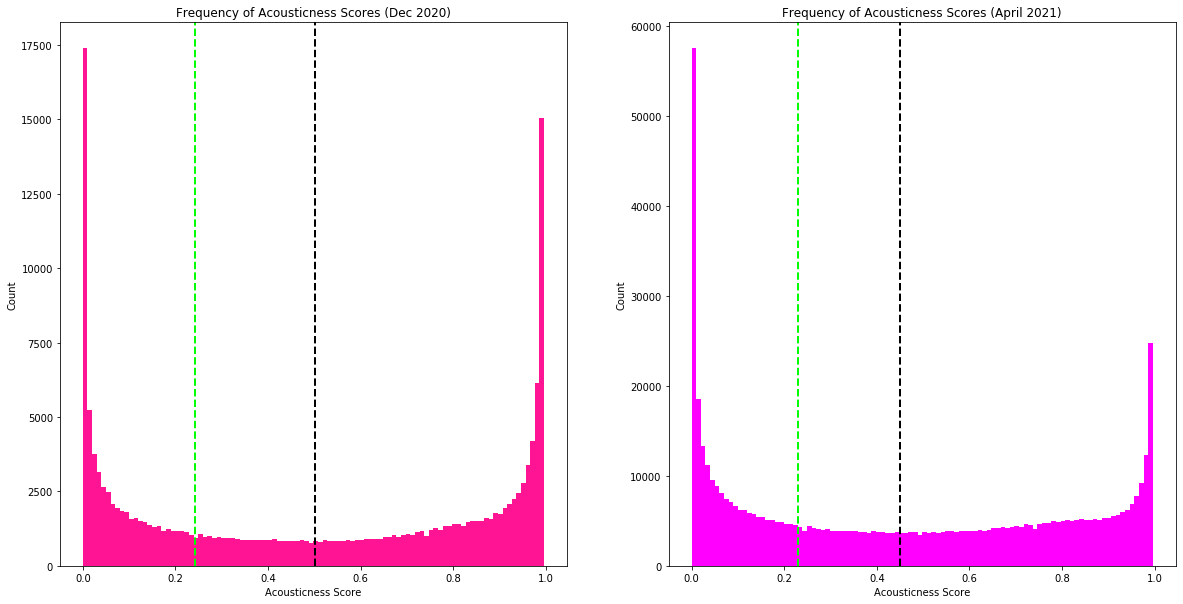

December Avg: 0.5021147637067079    April Avg: 0.449802968247642
December Popular Avg:  0.2431388    April Popular Avg: 0.22905530612244898


In [255]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.subplot(1,2,1)
plt.hist(tracksold['acousticness'],100, color='deeppink')
plt.axvline(tracksold['acousticness'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(tracksoldpop['acousticness'].mean(), color='lime', linestyle='dashed', linewidth=2)
plt.title("Frequency of Acousticness Scores (Dec 2020)")
plt.xlabel("Acousticness Score")
plt.ylabel("Count")
plt.subplot(1,2,2)
plt.hist(tracks['acousticness'],100, color='magenta')
plt.axvline(tracks['acousticness'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(trackspop['acousticness'].mean(), color='lime', linestyle='dashed', linewidth=2)
plt.title("Frequency of Acousticness Scores (April 2021)")
plt.xlabel("Acousticness Score")
plt.ylabel("Count")
plt.show()
print("December Avg:", tracksold['acousticness'].mean(), "   April Avg:", tracks['acousticness'].mean())
print("December Popular Avg: ", tracksoldpop['acousticness'].mean(), "   April Popular Avg:", trackspop['acousticness'].mean())

The average acousticness score for all songs in the datasets increased from December 2020 to April 2021 while the popular averages stayed about the same.

## Instrumentalness

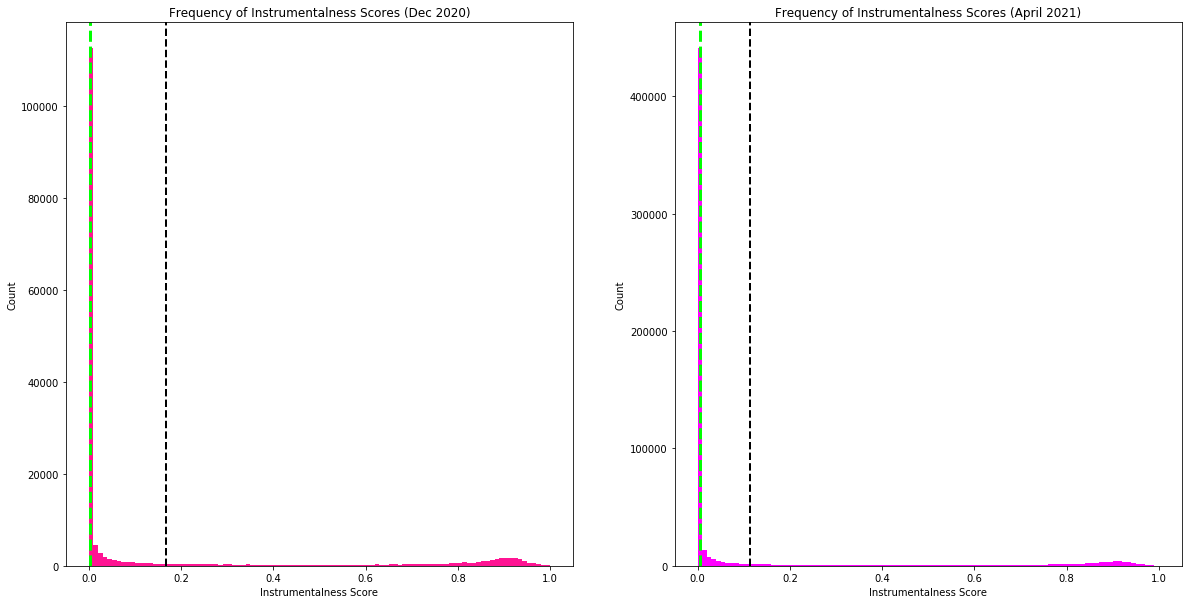

December Avg: 0.16700958082939785    April Avg: 0.11342468057530862
December Popular Avg:  0.002819034799999999    April Popular Avg: 0.004672854897959182


In [256]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.subplot(1,2,1)
plt.hist(tracksold['instrumentalness'],100, color='deeppink')
plt.axvline(tracksold['instrumentalness'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(tracksoldpop['instrumentalness'].mean(), color='lime', linestyle='dashed', linewidth=3)
plt.title("Frequency of Instrumentalness Scores (Dec 2020)")
plt.xlabel("Instrumentalness Score")
plt.ylabel("Count")
plt.subplot(1,2,2)
plt.hist(tracks['instrumentalness'],100, color='magenta')
plt.axvline(tracks['instrumentalness'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(trackspop['instrumentalness'].mean(), color='lime', linestyle='dashed', linewidth=3)
plt.title("Frequency of Instrumentalness Scores (April 2021)")
plt.xlabel("Instrumentalness Score")
plt.ylabel("Count")
plt.show()
print("December Avg:", tracksold['instrumentalness'].mean(), "   April Avg:", tracks['instrumentalness'].mean())
print("December Popular Avg: ", tracksoldpop['instrumentalness'].mean(), "   April Popular Avg:", trackspop['instrumentalness'].mean())

## Liveness

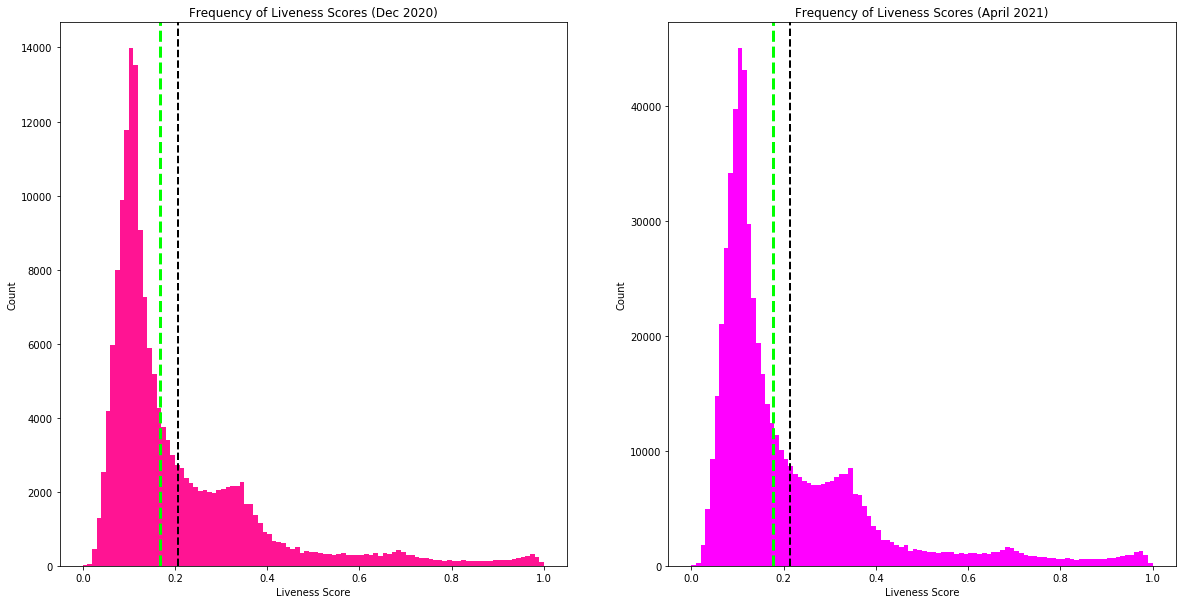

December Avg: 0.20583865545873456    April Avg: 0.2139331967043935
December Popular Avg:  0.168088    April Avg: 0.17629795918367347


In [257]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.subplot(1,2,1)
plt.hist(tracksold['liveness'],100, color='deeppink')
plt.axvline(tracksold['liveness'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(tracksoldpop['liveness'].mean(), color='lime', linestyle='dashed', linewidth=3)
plt.title("Frequency of Liveness Scores (Dec 2020)")
plt.xlabel("Liveness Score")
plt.ylabel("Count")
plt.subplot(1,2,2)
plt.hist(tracks['liveness'],100, color='magenta')
plt.axvline(tracks['liveness'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(trackspop['liveness'].mean(), color='lime', linestyle='dashed', linewidth=3)
plt.title("Frequency of Liveness Scores (April 2021)")
plt.xlabel("Liveness Score")
plt.ylabel("Count")
plt.show()
print("December Avg:", tracksold['liveness'].mean(), "   April Avg:", tracks['liveness'].mean())
print("December Popular Avg: ", tracksoldpop['liveness'].mean(), "   April Avg:", trackspop['liveness'].mean())

The averages did not change much from December to April.

## Valence:

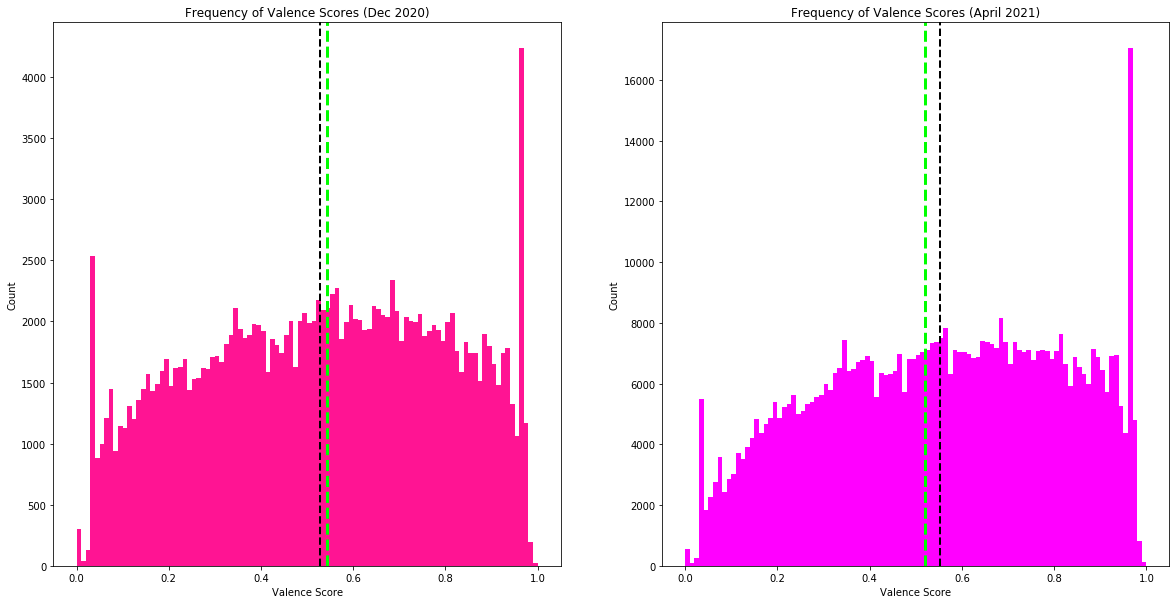

December Avg: 0.5285872111424981    April Avg: 0.5523061941031232
December Popular Avg:  0.54372    April Avg: 0.5197163265306122


In [258]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.subplot(1,2,1)
plt.hist(tracksold['valence'],100, color='deeppink')
plt.axvline(tracksold['valence'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(tracksoldpop['valence'].mean(), color='lime', linestyle='dashed', linewidth=3)
plt.title("Frequency of Valence Scores (Dec 2020)")
plt.xlabel("Valence Score")
plt.ylabel("Count")
plt.subplot(1,2,2)
plt.hist(tracks['valence'],100, color='magenta')
plt.axvline(tracks['valence'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(trackspop['valence'].mean(), color='lime', linestyle='dashed', linewidth=3)
plt.title("Frequency of Valence Scores (April 2021)")
plt.xlabel("Valence Score")
plt.ylabel("Count")
plt.show()
print("December Avg:", tracksold['valence'].mean(), "   April Avg:", tracks['valence'].mean())
print("December Popular Avg: ", tracksoldpop['valence'].mean(), "   April Avg:", trackspop['valence'].mean())

The valence score for popular songs is not far off from the average score for all songs. However, in December 2020 the popular valence score was greater than the average overall valence score. In April 2021 the popular valence score was lower than the average overall valence score. This was interesting to me, as valence in this case refers to happiness in the songs. So it appears popular songs were more sad in April 2021. This makes sense, as one of the biggest songs of 2021 has been Drivers License by Olivia Rodrigo which is a sad song and has a valence score of 0.132.

## Tempo

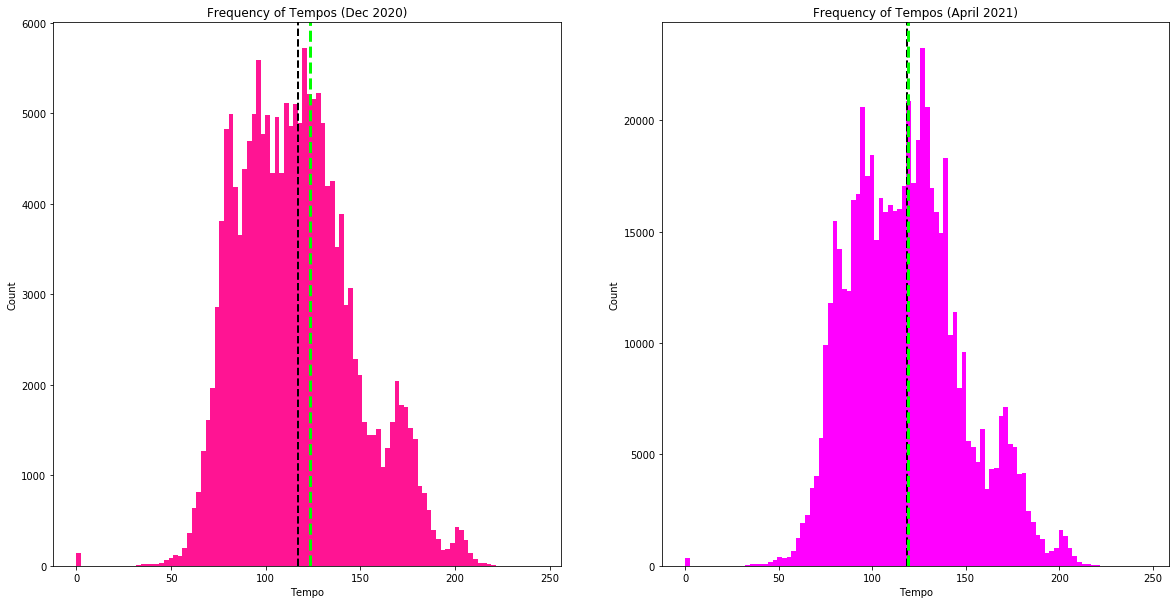

December Avg: 116.86158961752855    April Avg: 118.46792996432112
December Popular Avg:  123.56129999999997    April Avg: 119.02767346938776


In [259]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.subplot(1,2,1)
plt.hist(tracksold['tempo'],100, color='deeppink')
plt.axvline(tracksold['tempo'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(tracksoldpop['tempo'].mean(), color='lime', linestyle='dashed', linewidth=3)
plt.title("Frequency of Tempos (Dec 2020)")
plt.xlabel("Tempo")
plt.ylabel("Count")
plt.subplot(1,2,2)
plt.hist(tracks['tempo'],100, color='magenta')
plt.axvline(tracks['tempo'].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(trackspop['tempo'].mean(), color='lime', linestyle='dashed', linewidth=3)
plt.title("Frequency of Tempos (April 2021)")
plt.xlabel("Tempo")
plt.ylabel("Count")
plt.show()
print("December Avg:", tracksold['tempo'].mean(), "   April Avg:", tracks['tempo'].mean())
print("December Popular Avg: ", tracksoldpop['tempo'].mean(), "   April Avg:", trackspop['tempo'].mean())

Popular songs in December 2020 were slightly more upbeat compared to all the songs from that dataset, while popular songs from April 2021 were about the same tempo as the rest of the songs in that dataset.

Let's see if we can use regression to predict which songs are popular based on some of their descriptors. I used a one-hot encoding method to categorize a song as popular (1) if its popularity score is 90 or above and zero otherwise.

In [260]:
trackspop2 = trackspop[['popularity', 'duration_ms','danceability','energy','valence']]
tracks2 = tracks[['popularity', 'duration_ms','danceability','energy','valence']].sample(49)
tracks3 = tracks2.append(trackspop2)
tracks3['popularity'] = tracks3['popularity'].apply(lambda x: 1 if x >89 else 0)
tracks3.sort_values('popularity', ascending=False)

,popularity,duration_ms,danceability,energy,valence
86016,1,240400,0.612,0.8070,0.3980
91866,1,226987,0.749,0.4630,0.1900
92841,1,160000,0.709,0.5480,0.5430
92839,1,166028,0.734,0.8740,0.9050
92837,1,181733,0.746,0.6900,0.4970
...,...,...,...,...,...
140246,0,203266,0.633,0.7540,0.9080
553205,0,187280,0.443,0.2580,0.1980
391377,0,117840,0.585,0.4960,0.8860
270352,0,441093,0.375,0.0986,0.1490


In [261]:
x_train, x_test, y_train, y_test = train_test_split(tracks2,tracks2.popularity,test_size = 0.30,random_state = 3)
logistreg = LogisticRegression(solver = "liblinear")
logistreg.fit(x_train, y_train)
logistreg.score(x_train, y_train)

0.2647058823529412

In [262]:
score = logistreg.score(x_test, y_test)
print(score)

0.0


In [263]:
trackspop2 = tracksoldpop[['popularity', 'duration_ms','danceability','energy']]
tracks2 = tracksold[['popularity', 'duration_ms','danceability','energy']].sample(49)
tracks3 = tracks2.append(trackspop2)
tracks3['popularity'] = tracks3['popularity'].apply(lambda x: 1 if x >89 else 0)
tracks3.sort_values('popularity', ascending=False)
x_train, x_test, y_train, y_test = train_test_split(tracks2,tracks2.popularity,test_size = 0.30,random_state = 3)
logistreg = LogisticRegression(solver = "liblinear")
logistreg.fit(x_train, y_train)
logistreg.score(x_train, y_train)

0.23529411764705882

In [264]:
score = logistreg.score(x_test, y_test)
print(score)

0.26666666666666666


Those numbers are not great. Initially my model had a score of 99 when I ran it on the entire dataset, which sounds great. However, there are very few popular songs in the overall dataset. So if the model classifies everything as unpopular, it would score pretty well. However, the descriptors were not actually aiding in modeling the data. Even with a dataset that is explicitly half popular songs and half a random selection from the dataset, the model is worse than guessing. Why is this? Initially to try to find trends, I made scatterplots comparing the popularity score to individual descriptors. For example, below is a scatterplot I made trying to compare popularity scores to danceability scores:

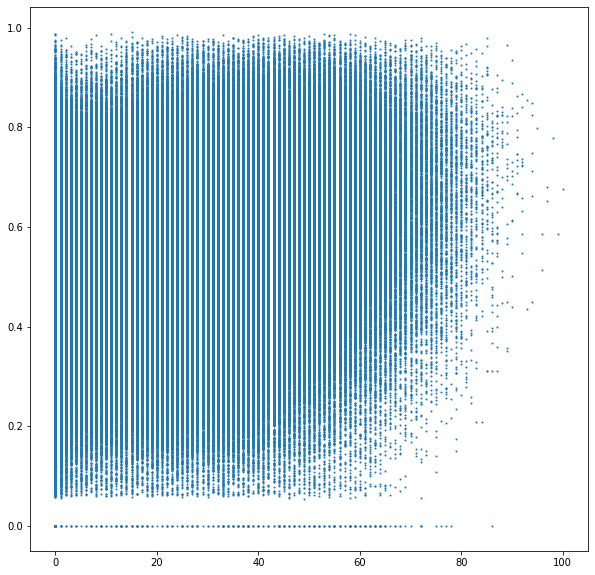

In [265]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.scatter(tracks['popularity'],tracks['danceability'],1)
plt.show()

It is a mess. What I concluded was that any type of song can flop. Popular songs however tend to be slightly more danceable. So just because a song is danceable does not mean it is popular. However, if a song is popular, it is likely to have a higher danceability score.

Lastly, as an aside I decided to look at a dataset containing artists' popularity scores and their follower counts. Below are the 20 most popular artists from April 2021.

In [266]:
artists.sort_values('popularity',ascending=False).head(20)

,id,followers,genres,name,popularity
144481,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100
313676,3TVXtAsR1Inumwj472S9r4,54416812.0,"['canadian hip hop', 'canadian pop', 'hip hop'...",Drake,98
115489,4q3ewBCX7sLwd24euuV69X,32244734.0,"['latin', 'reggaeton', 'trap latino']",Bad Bunny,98
126338,06HL4z0CvFAxyc27GXpf02,38869193.0,"['pop', 'post-teen pop']",Taylor Swift,98
144483,1Xyo4u8uXC1ZmMpatF05PJ,31308207.0,"['canadian contemporary r&b', 'canadian pop', ...",The Weeknd,96
115490,4MCBfE4596Uoi2O4DtmEMz,16996777.0,"['chicago rap', 'melodic rap']",Juice WRLD,96
144484,3Nrfpe0tUJi4K4DXYWgMUX,31623813.0,"['k-pop', 'k-pop boy group']",BTS,96
144485,66CXWjxzNUsdJxJ2JdwvnR,61301006.0,"['pop', 'post-teen pop']",Ariana Grande,95
144487,6M2wZ9GZgrQXHCFfjv46we,24123468.0,"['dance pop', 'pop', 'uk pop']",Dua Lipa,95
115491,7iK8PXO48WeuP03g8YR51W,5001808.0,['trap latino'],Myke Towers,95


I was just curious to see how their popularity score differed from their follower count or if it was the same. For the most part, the more popular an artist is, the more followers they have. However, some artists that are very popular do not have as many followers. I attribute this to newer artists/one hit wonders compared to legacy and established artists that are popular in the moment and also have a large established fanbase.

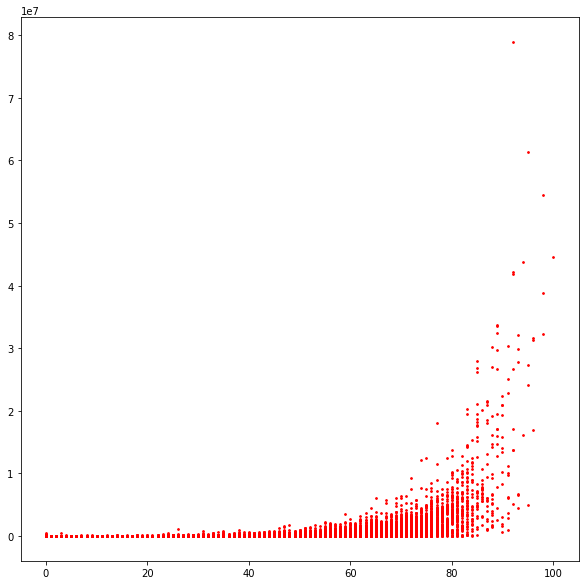

In [267]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.scatter(artists['popularity'],artists['followers'],3,color="red")
plt.show()

This project was very interesting for me, and I would love to expand on it more. If I continue, I would want to explore even more data from over the years, along with combining the artist and song tables to look for more trends. Another dataset I would love to explore is the list of the all-time most-streamed songs on Spotify and see what descriptors they have in common.

Thank you! :-)